In [1]:
# generate random data matrix
n,d = 6,4
X = randn(n,d)

# optional: give it linearly dependent columns
# X[:,3] = X[:,2]

6×4 Array{Float64,2}:
 -0.489083    -1.67077   -0.490296   0.459634
  1.25483      0.553161  -0.288386  -0.635386
 -0.416563    -1.89357    1.07109    0.231316
 -0.0736414    0.647585  -2.98442   -1.88636 
 -1.8338      -0.362022  -2.63185   -1.69263 
  0.00828991  -0.168618   1.15795    0.168239

In [2]:
# form data from noisy linear model
β♮ = randn(d)
y = X*β♮ + .1*randn(n);

In [3]:
# look at least squares objective as a function of w
f(β) = norm(y - X*β)^2

f (generic function with 1 method)

In [4]:
using PyPlot

INFO: Recompiling stale cache file /Users/madeleine/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


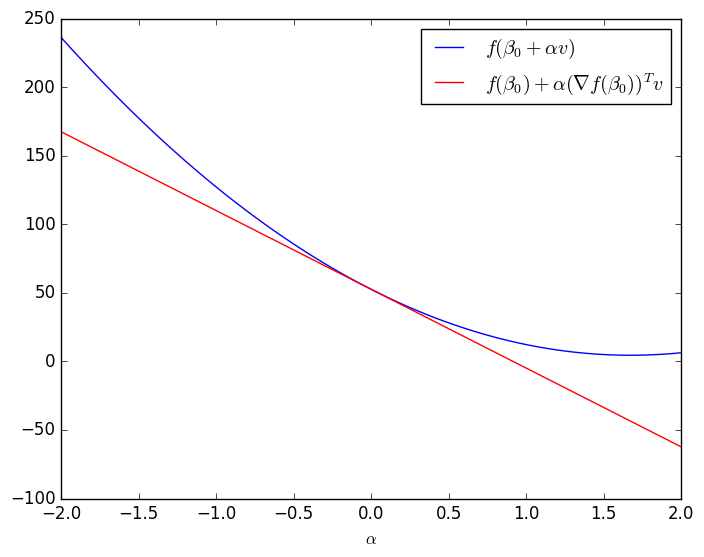

PyObject <matplotlib.legend.Legend object at 0x325caef90>

In [6]:
# gradient at w0 approximates f(w) near w0
β0 = randn(d)
v = randn(d)
alphas = linspace(-2,2,100)
∇f = 2X'*X*β0 - 2X'*y
plot(alphas, [f(β0 + alpha*v) for alpha in alphas], label=L"$f(\beta_0 + \alpha v)$")
plot(alphas, [f(β0) + alpha*dot(∇f, v) for alpha in alphas], "r", label=L"$f(\beta_0) + \alpha (\nabla f(\beta_0))^T v$")
xlabel(L"$\alpha$")
legend()

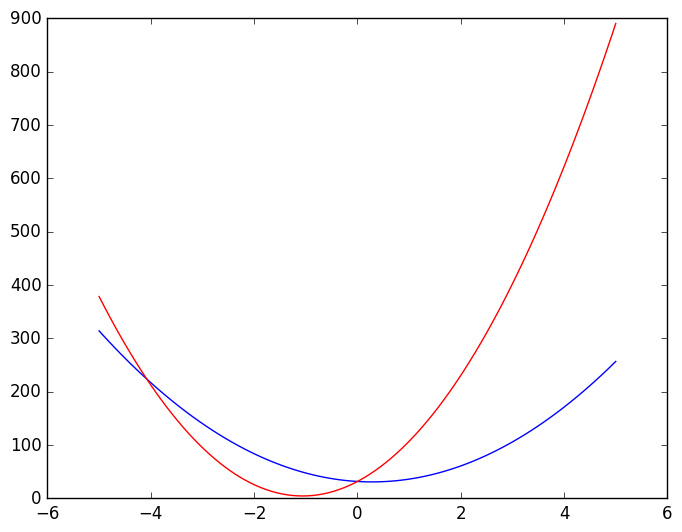

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x328eeb210>

In [9]:
# function decreases fastest in the -∇f(w) direction
β0 = randn(d)
v = randn(d)
∇f = 2X'*X*β0 - 2X'*y
v_normalized = v/norm(v)
∇f_normalized = ∇f/norm(∇f)
alphas = linspace(-5,5,100)
plot(alphas, [f(β0 + alpha*v_normalized) for alpha in alphas])
plot(alphas, [f(β0 + alpha*∇f_normalized) for alpha in alphas],"r")

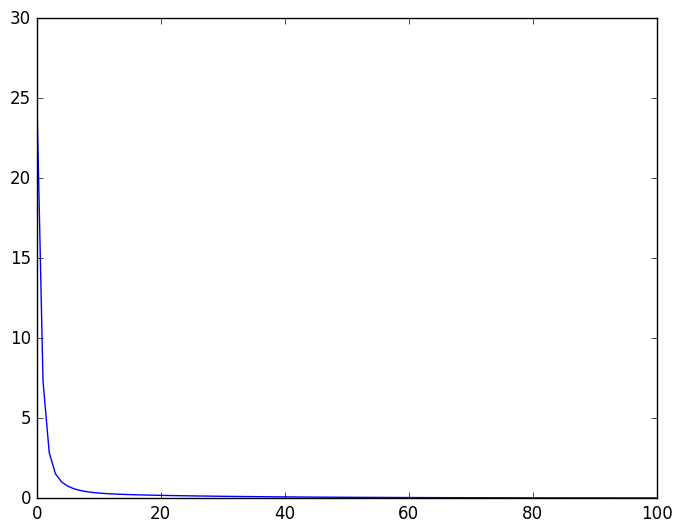

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x329735990>

In [13]:
# gradient descent

alpha = .01      # small constant step size
β = randn(d)     # start at a random w
fks = Float64[]  # a list to record all the values f(w) we see
push!(fks, f(β)) # record the initial value

# start descending!
for k=1:100
    β -= alpha*(2X'*X*β - 2X'*y) # take a gradient step
    push!(fks, f(β))             # record its value
end
plot(fks)
# semilogy(fks)
# loglog(fks)